In [1]:
# https://www.codexa.net/lightgbm-beginner/

In [2]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
classes = pd.read_csv('data/kuzushiji/kmnist_classmap.csv')
print(classes.shape)
classes

(10, 3)


,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [4]:
# Load train dataset
X_train = np.load('data/kuzushiji/kmnist-train-imgs.npz')['arr_0']
y_train = np.load('data/kuzushiji/kmnist-train-labels.npz')['arr_0']

# Load test dataset
X_test = np.load('data/kuzushiji/kmnist-test-imgs.npz')['arr_0']
y_test = np.load('data/kuzushiji/kmnist-test-labels.npz')['arr_0']

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train[:5])
classes

[8 7 0 1 4]


,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [7]:
labelindex = classes.set_index('index').to_dict()['char']
labelindex

{0: 'お',
 1: 'き',
 2: 'す',
 3: 'つ',
 4: 'な',
 5: 'は',
 6: 'ま',
 7: 'や',
 8: 'れ',
 9: 'を'}

In [8]:
print(X_train.max())
print(X_train.min())

255
0


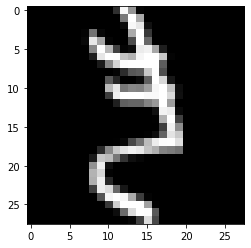

In [9]:
idx = 423
plt.imshow(X_train[idx], cmap='gray')
plt.show()

In [10]:
print(y_train[idx])
print(labelindex[y_train[idx]])

1
き


In [11]:
X_train[0, 10:15, 10:15]

array([[  0,   0, 133,  91,   7],
       [  0,   0, 128, 128,  20],
       [  0,   0,  95, 224,  20],
       [  0,   0, 112, 159,  64],
       [  0,   1, 211, 234, 253]], dtype=uint8)

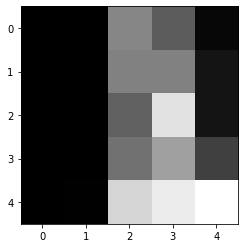

In [12]:
plt.imshow(X_train[0, 10:15, 10:15], cmap='gray')

In [13]:
# normalize train/test images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
X_train[0, 10:15, 10:15]

array([[0.        , 0.        , 0.52156863, 0.35686275, 0.02745098],
       [0.        , 0.        , 0.50196078, 0.50196078, 0.07843137],
       [0.        , 0.        , 0.37254902, 0.87843137, 0.07843137],
       [0.        , 0.        , 0.43921569, 0.62352941, 0.25098039],
       [0.        , 0.00392157, 0.82745098, 0.91764706, 0.99215686]])

In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [17]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
# prepare train/val dataset to train lgbm
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [19]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 10,
    'verbose': 2
}

In [20]:
gbm = lgb.train(
    params,
    train_data,
    valid_sets=val_data,
    num_boost_round=300,
    verbose_eval=5,
)

[5]	valid_0's multi_logloss: 1.71401
[10]	valid_0's multi_logloss: 1.43197
[15]	valid_0's multi_logloss: 1.2474
[20]	valid_0's multi_logloss: 1.11132
[25]	valid_0's multi_logloss: 1.00722
[30]	valid_0's multi_logloss: 0.924201
[35]	valid_0's multi_logloss: 0.856528
[40]	valid_0's multi_logloss: 0.799088
[45]	valid_0's multi_logloss: 0.751136
[50]	valid_0's multi_logloss: 0.711042
[55]	valid_0's multi_logloss: 0.675216
[60]	valid_0's multi_logloss: 0.645093
[65]	valid_0's multi_logloss: 0.617719
[70]	valid_0's multi_logloss: 0.594623
[75]	valid_0's multi_logloss: 0.573648
[80]	valid_0's multi_logloss: 0.5548
[85]	valid_0's multi_logloss: 0.537461
[90]	valid_0's multi_logloss: 0.52171
[95]	valid_0's multi_logloss: 0.508122
[100]	valid_0's multi_logloss: 0.49569
[105]	valid_0's multi_logloss: 0.483991
[110]	valid_0's multi_logloss: 0.473352
[115]	valid_0's multi_logloss: 0.463618
[120]	valid_0's multi_logloss: 0.455117
[125]	valid_0's multi_logloss: 0.446827
[130]	valid_0's multi_logloss:

In [21]:
preds = gbm.predict(X_test)
print(preds.shape)

(10000, 10)


In [22]:
y_pred = np.argmax(preds, axis=1)
print(y_pred.shape)

(10000,)


In [23]:
confusion_matrix(y_test, y_pred)

array([[913,   3,   3,   2,  24,   8,   3,  25,  17,   2],
       [  1, 884,  23,   2,  13,   5,  41,   6,  10,  15],
       [  7,  10, 866,  40,  19,   4,  24,   9,  11,  10],
       [  2,   7,  24, 947,   6,   2,   3,   3,   0,   6],
       [ 22,  11,  16,   8, 889,   4,  18,   7,  22,   3],
       [  6,  16,  71,   6,  12, 850,  30,   1,   5,   3],
       [  3,   7,  32,   3,  13,   3, 931,   5,   1,   2],
       [  7,   6,  13,   2,  42,   1,  34, 847,  31,  17],
       [  3,  20,   7,  19,   2,   6,  16,   1, 923,   3],
       [  8,  12,  24,   5,  28,   2,  12,  11,  15, 883]])

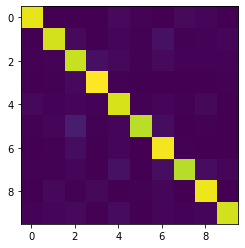

In [24]:
plt.imshow(confusion_matrix(y_test, y_pred))

In [25]:
accuracy_score(y_test, y_pred)

0.8933